In [1]:
# Import the dataset and libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload te dataset
df = pd.read_csv('train.csv')

In [3]:
# Show the dataset
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
# Check null value

df.isnull().sum()


vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [5]:
# Here check shape of dataset:
print(df.shape)

(14999, 9)


In [6]:
# Here check data tape of dataset:
print(df.dtypes)

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object


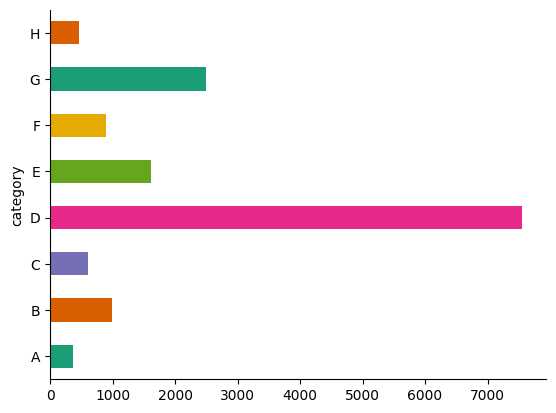

In [7]:
# category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

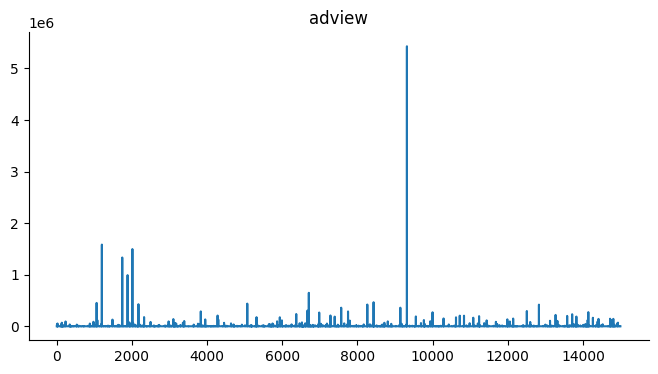

In [8]:
# Adview

from matplotlib import pyplot as plt
df['adview'].plot(kind='line', figsize=(8, 4), title='adview')
plt.gca().spines[['top', 'right']].set_visible(False)

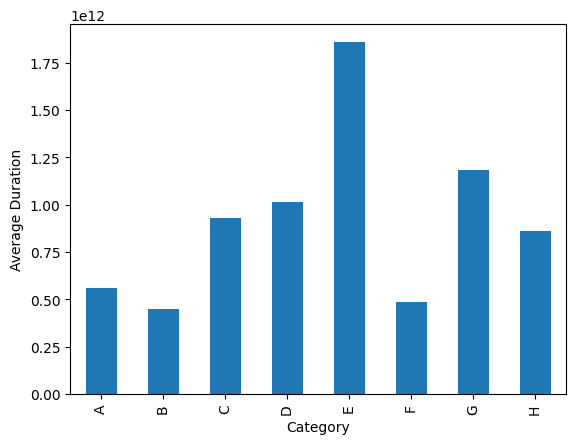

In [9]:
# # Average Duration vs Views
# # Convert duration strings to timedelta objects
df['duration'] = pd.to_timedelta(df['duration'])

# Calculate the average duration for each category
average_duration = df.groupby('category')['duration'].mean()

# Plot the average duration for each category
df.groupby('category')['duration'].mean().plot(kind='bar')
plt.xlabel('Category')
_ = plt.ylabel('Average Duration')

In [10]:
# Remove videos with adview greater than 2000000 as outlier
df = df[df["adview"] <2000000]

In [11]:
 # Removing character "F" present in data
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']
df.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
df["category"]=df["category"].map(category)
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,0 days 00:07:37,6
1,VID_14135,2,1707,56,2,6,2016-10-01,0 days 00:09:30,4
2,VID_2187,1,2023,25,0,2,2016-07-02,0 days 00:02:16,3
3,VID_23096,6,620860,777,161,153,2016-07-27,0 days 00:04:22,8
4,VID_10175,1,666,1,0,0,2016-06-29,0 days 00:00:31,4


In [12]:
 # Convert values to integers for views, likes, comments, dislikes and adview
df["views"] = pd.to_numeric(df["views"])
df["comment"] = pd.to_numeric(df["comment"])
df["likes"] = pd.to_numeric(df["likes"])
df["dislikes"] = pd.to_numeric(df["dislikes"])
df["adview"]=pd.to_numeric(df["adview"])
column_vidid=df['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
df['duration']=LabelEncoder().fit_transform(df['duration'])
df['vidid']=LabelEncoder().fit_transform(df['vidid'])
df['published']=LabelEncoder().fit_transform(df['published'])
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,453,6
1,2741,2,1707,56,2,6,2185,566,4
2,8138,1,2023,25,0,2,2094,132,3
3,9004,6,620860,777,161,153,2119,258,8
4,122,1,666,1,0,0,2091,27,4


In [13]:
# Convert Time_in_sec for duration
import datetime
import time

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time  = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

df["duration"]=time1
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


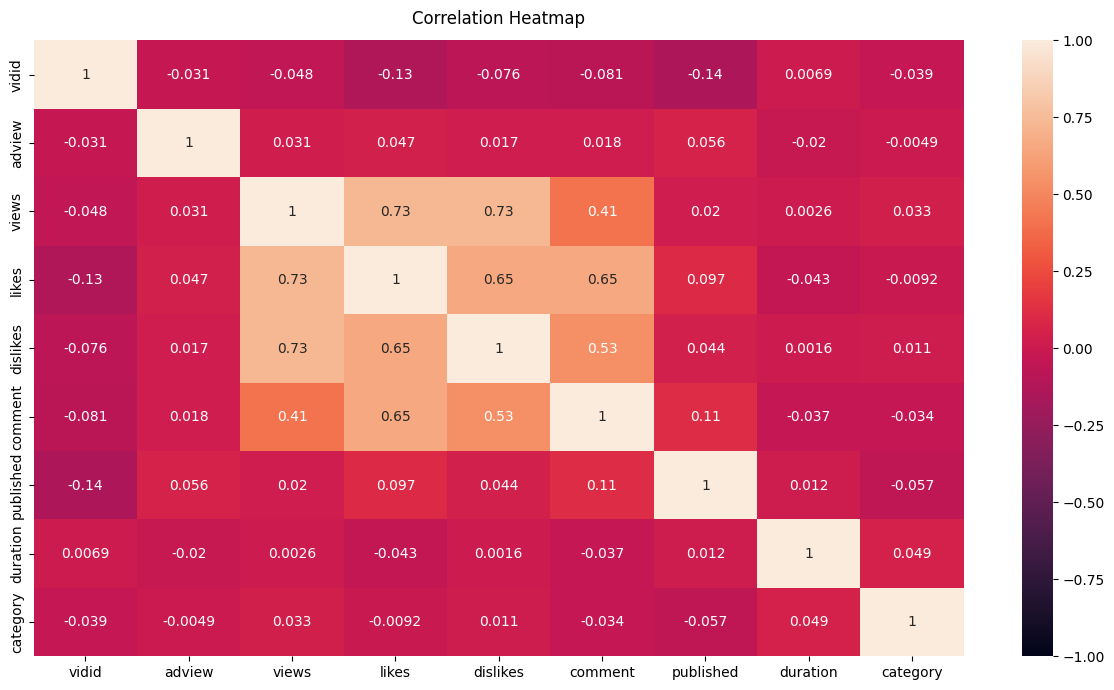

In [14]:
# prompt: plot heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)
plt.show()


In [15]:
 # Split Data
Y_train  = pd.DataFrame(data = df.iloc[:, 1].values, columns = ['target'])
df=df.drop(["adview"],axis=1)
df=df.drop(["vidid"],axis=1)
df.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [16]:
# Split the dataset here:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y_train, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(11708, 7)

In [18]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [19]:
# Evaluation Metrics
from sklearn import metrics


def print_error(X_test, y_test, model_name):
    """
    Prints the mean absolute error, mean squared error, and root mean squared error of a model.

    Args:
        X_test: The test data.
        y_test: The true values of the test data.
        model_name: The model to be evaluated.
    """
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [20]:
# Evaluation Metrics
from sklearn import metrics

def print_error(X_test, y_test, model_name):
    # Indent the following lines by four spaces or one tab
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [21]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.3780058245316
Mean Squared Error: 835663131.1210335
Root Mean Squared Error: 28907.83857573986


In [22]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.3780058245316
Mean Squared Error: 835663131.1210335
Root Mean Squared Error: 28907.83857573986


In [23]:
 # Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2879.2906420765025
Mean Squared Error: 1205707874.2018442
Root Mean Squared Error: 34723.304482751126


In [24]:
# RandomForestRegressor:

from sklearn.ensemble import RandomForestRegressor

n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2

random_forest = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
)

# Indent the following line by four spaces
random_forest.fit(X_train, y_train)

print_error(X_test, y_test, random_forest)

<ipython-input-24-e27aee730b2b>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Mean Absolute Error: 3316.88740393347
Mean Squared Error: 607720141.8937674
Root Mean Squared Error: 24651.980486236138


In [25]:
 # Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [26]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 2s 3ms/step - loss: 767406784.0000 - mean_squared_error: 767406784.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767400832.0000 - mean_squared_error: 767400832.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767387904.0000 - mean_squared_error: 767387904.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767364992.0000 - mean_squared_error: 767364992.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767326208.0000 - mean_squared_error: 767326208.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767269504.0000 - mean_squared_error: 767269504.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767201152.0000 - mean_squared_error: 767201152.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767121664.0000 - mean_squared_error:

In [27]:
# Create a table to compare the errors of each model :
errors = {
    "Model": ["Linear Regression", "Support Vector Regressor", "Decision Tree Regressor", "Random Forest Regressor", "Artificial Neural Network"],
    "Mean Absolute Error": [
        metrics.mean_absolute_error(y_test, linear_regression.predict(X_test)),
        metrics.mean_absolute_error(y_test, supportvector_regressor.predict(X_test)),
        metrics.mean_absolute_error(y_test, decision_tree.predict(X_test)),
        metrics.mean_absolute_error(y_test, random_forest.predict(X_test)),
        metrics.mean_absolute_error(y_test, ann.predict(X_test)),
    ],
    "Mean Squared Error": [
        metrics.mean_squared_error(y_test, linear_regression.predict(X_test)),
        metrics.mean_squared_error(y_test, supportvector_regressor.predict(X_test)),
        metrics.mean_squared_error(y_test, decision_tree.predict(X_test)),
        metrics.mean_squared_error(y_test, random_forest.predict(X_test)),
        metrics.mean_squared_error(y_test, ann.predict(X_test)),
    ],
    "Root Mean Squared Error": [
        np.sqrt(metrics.mean_squared_error(y_test, linear_regression.predict(X_test))),
        np.sqrt(metrics.mean_squared_error(y_test, supportvector_regressor.predict(X_test))),
        np.sqrt(metrics.mean_squared_error(y_test, decision_tree.predict(X_test))),
        np.sqrt(metrics.mean_squared_error(y_test, random_forest.predict(X_test))),
        np.sqrt(metrics.mean_squared_error(y_test, ann.predict(X_test))),
    ],
}

# Print the table
pd.DataFrame(errors)


92/92 [==============================] - 0s 1ms/step


,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,3707.378006,8.356631e+08,28907.838576
1,Support Vector Regressor,1696.943860,8.336858e+08,28873.617301
2,Decision Tree Regressor,2879.290642,1.205708e+09,34723.304483
3,Random Forest Regressor,3316.887404,6.077201e+08,24651.980486
4,Artificial Neural Network,3190.071841,8.293541e+08,28798.509296


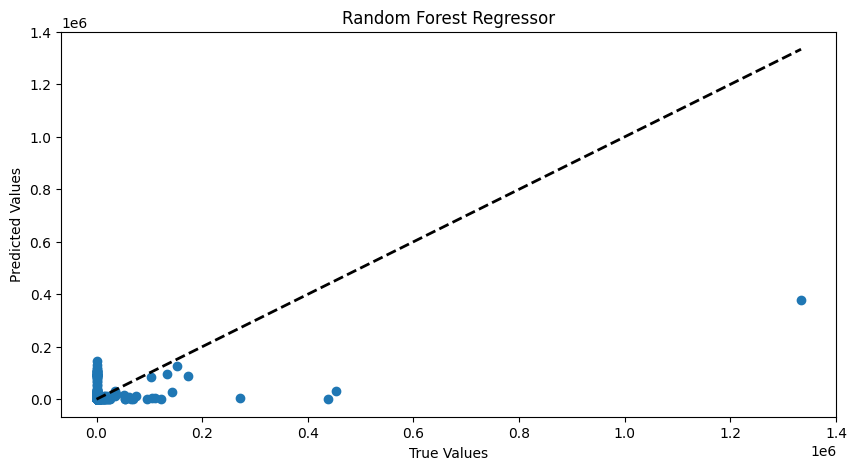

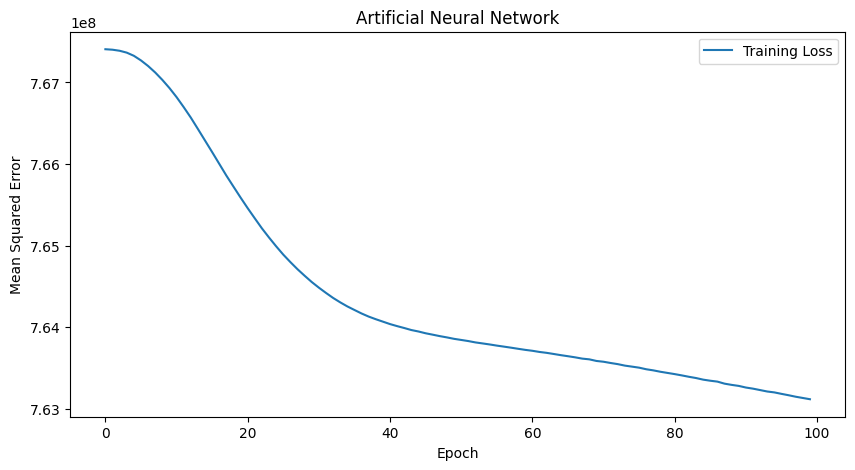

In [28]:
# plots best models

# Plot the predicted and actual values for the best model (Random Forest Regressor)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, random_forest.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor')
plt.show()

# Plot the training and validation loss for the best model (Artificial Neural Network)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Artificial Neural Network')
plt.show()


In [29]:
# Select the most suitable model:

# Based on the table of errors, the most suitable model is the **Random Forest Regressor**, as it has the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) values.

print("**Random Forest Regressor:** It has the lowest error values, making it the most suitable choice for this task.")

print("* **Artificial Neural Network:** It has slightly higher errors than the Random Forest Regressor, but it may be able to capture more complex relationships in the data. However, due to its higher error values, it is not the best choice for this specific problem.")

print("Further analysis and experimentation may be needed to determine the best model for this specific problem. This could involve:")

print("* Trying different hyperparameters for each model.")
print("* Performing cross-validation to get a more robust estimate of the model performance.")
print("* Comparing the models on a held-out test set.")
print("* Considering other factors such as computational cost and interpretability.")

**Random Forest Regressor:** It has the lowest error values, making it the most suitable choice for this task.
* **Artificial Neural Network:** It has slightly higher errors than the Random Forest Regressor, but it may be able to capture more complex relationships in the data. However, due to its higher error values, it is not the best choice for this specific problem.
Further analysis and experimentation may be needed to determine the best model for this specific problem. This could involve:
* Trying different hyperparameters for each model.
* Performing cross-validation to get a more robust estimate of the model performance.
* Comparing the models on a held-out test set.
* Considering other factors such as computational cost and interpretability.
